In [1]:
import os,sys
from glob import glob
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib
import fiona
import rasterio as rio

# helpers
from xarr_helpers import *

%matplotlib inline
from pylab import *

rcParams['figure.figsize'] = 10, 10

font = {'family' : 'normal',
        'weight' : 'medium',
        'size'   : 14}

matplotlib.rc('font', **font)

from shapely.geometry import mapping, box

In [2]:
fi = r"D:\projects\headwall_neon\headwall_data\raw\radiance\temp"

xarr_VNIR = xr.open_rasterio(fi, chunks=(256, 256, 256))
x_vnir, y_vnir = xarr_VNIR.coords['x'].values, xarr_VNIR.coords['y'].values

xarr_VNIR.coords['x'].values

array([479101.173293, 479101.243879, 479101.314465, ..., 479242.768809,
       479242.839395, 479242.909981])

In [3]:
xmin, xmax = x_vnir.max(), x_vnir.min()
xmin, xmax

ymin, ymax = y_vnir.max(), y_vnir.min()
ymin, ymax

(4442300.882707, 4442252.1077809995)

In [41]:
with rio.open(fi) as src:
    print(src.profile)

{'driver': 'ENVI', 'dtype': 'float32', 'nodata': None, 'width': 1665, 'height': 442, 'count': 270, 'crs': CRS.from_dict(init='epsg:4326'), 'transform': Affine(1.00000000000145e-06, -0.0, -105.24530134,
       -0.0, -1.00000000000145e-06, 40.13077878), 'tiled': False, 'interleave': 'band'}


C:\software\anaconda3\envs\eapy_gbdx\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


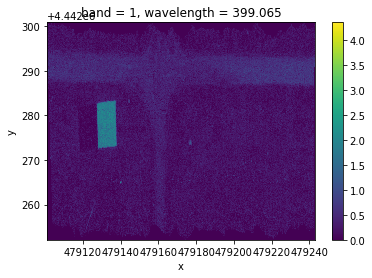

In [4]:
xarr_VNIR[0,:,:].plot()

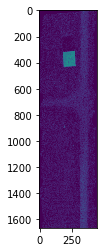

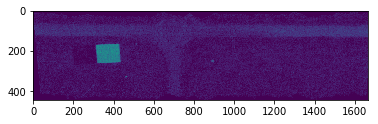

AttributeError: 'DataArray' object has no attribute 'rot90'

In [38]:
plt.imshow(xarr_VNIR[0,:,:].values)
plt.show()
plt.imshow(np.flipud(xarr_VNIR[0,:,:].values.T))
plt.show()
plt.imshow(xarr_VNIR.rot90()[0,:,:])

In [32]:
xarr_VNIR.transpose().shape, xarr_VNIR.shape

((442, 1665, 270), (270, 1665, 442))

In [36]:
help(np.flipud)

Help on function flipud in module numpy:

flipud(m)
    Flip array in the up/down direction.
    
    Flip the entries in each column in the up/down direction.
    Rows are preserved, but appear in a different order than before.
    
    Parameters
    ----------
    m : array_like
        Input array.
    
    Returns
    -------
    out : array_like
        A view of `m` with the rows reversed.  Since a view is
        returned, this operation is :math:`\mathcal O(1)`.
    
    See Also
    --------
    fliplr : Flip array in the left/right direction.
    rot90 : Rotate array counterclockwise.
    
    Notes
    -----
    Equivalent to ``m[::-1,...]``.
    Does not require the array to be two-dimensional.
    
    Examples
    --------
    >>> A = np.diag([1.0, 2, 3])
    >>> A
    array([[ 1.,  0.,  0.],
           [ 0.,  2.,  0.],
           [ 0.,  0.,  3.]])
    >>> np.flipud(A)
    array([[ 0.,  0.,  3.],
           [ 0.,  2.,  0.],
           [ 1.,  0.,  0.]])
    
    >>> A = n